<a href="https://colab.research.google.com/github/muhsupriazis/muhsupriazis/blob/main/clastering%20data%20hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Upload file Excel
from google.colab import files
uploaded = files.upload()

# Baca file Excel
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving Database.xlsx to Database.xlsx


In [3]:
# Menyiapkan DataFrame kosong untuk pivot tabel akhir
weeks = df['week'].unique()
days_of_week = df['day'].unique()
hours_of_day = df['hour'].unique()

# Create a list to hold the pivot table data
pivot_data = []

# Iterate over each location and hour
for location in df['location_name'].unique():
    for hour in hours_of_day:
        # Filter data for the current location and hour
        filtered_data = df[(df['location_name'] == location) & (df['hour'] == hour)]

        # Initialize list to hold traffic values for each week and day
        traffic_values = []

        for week in weeks:
            for day in days_of_week:
                # Filter data for the current week and day
                week_day_data = filtered_data[(filtered_data['week'] == week) & (filtered_data['day'] == day)]

                if not week_day_data.empty:
                    traffic_values.append(week_day_data['traffic'].values[0])
                else:
                    traffic_values.append(0)  # Add 0 if no data for this combination

        # Add data for the current location and hour
        pivot_data.append([location, hour] + traffic_values)

# Define column names
traffic_columns = [f'traffic_{i+1}' for i in range(len(weeks) * len(days_of_week))]
columns = ['location_name', 'hour'] + traffic_columns

# Create DataFrame from pivot data
pivot_df = pd.DataFrame(pivot_data, columns=columns)

In [4]:
# Simpan pivot table ke file Excel
output_file = '/content/pivot_table_hour.xlsx'
pivot_df.to_excel(output_file, index=False)

# Download file
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [6]:
# Load the pivot table data
file_name = '/content/pivot_table_hour.xlsx'
pivot_df = pd.read_excel(file_name)


In [7]:
# Menyiapkan data untuk klasterisasi
# Mengambil kolom numeric untuk klasterisasi (misalnya traffic1, traffic2, dst.)
data = pivot_df.drop(columns=['location_name', 'hour'])  # Drop non-numeric columns

# Normalisasi data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


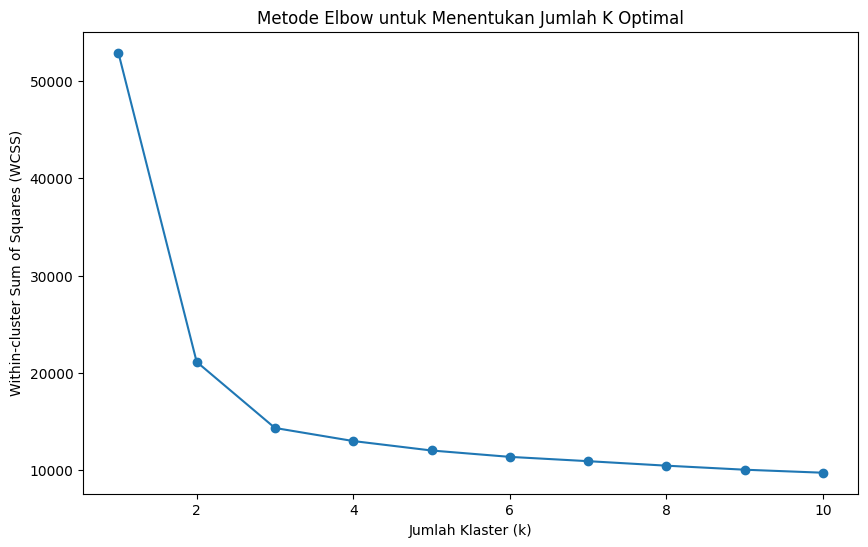

In [8]:
# Menentukan jumlah klaster yang optimal menggunakan metode elbow
wcss = []
for i in range(1, 11):  # Coba 1 sampai 10 klaster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Plot hasil metode elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah K Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()


In [9]:
# Klasterisasi menggunakan K-Means dengan k yang optimal
k = 2  # Misalnya k yang optimal setelah metode elbow
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_normalized)

# Menambahkan hasil klasterisasi ke DataFrame
pivot_df['Cluster'] = clusters


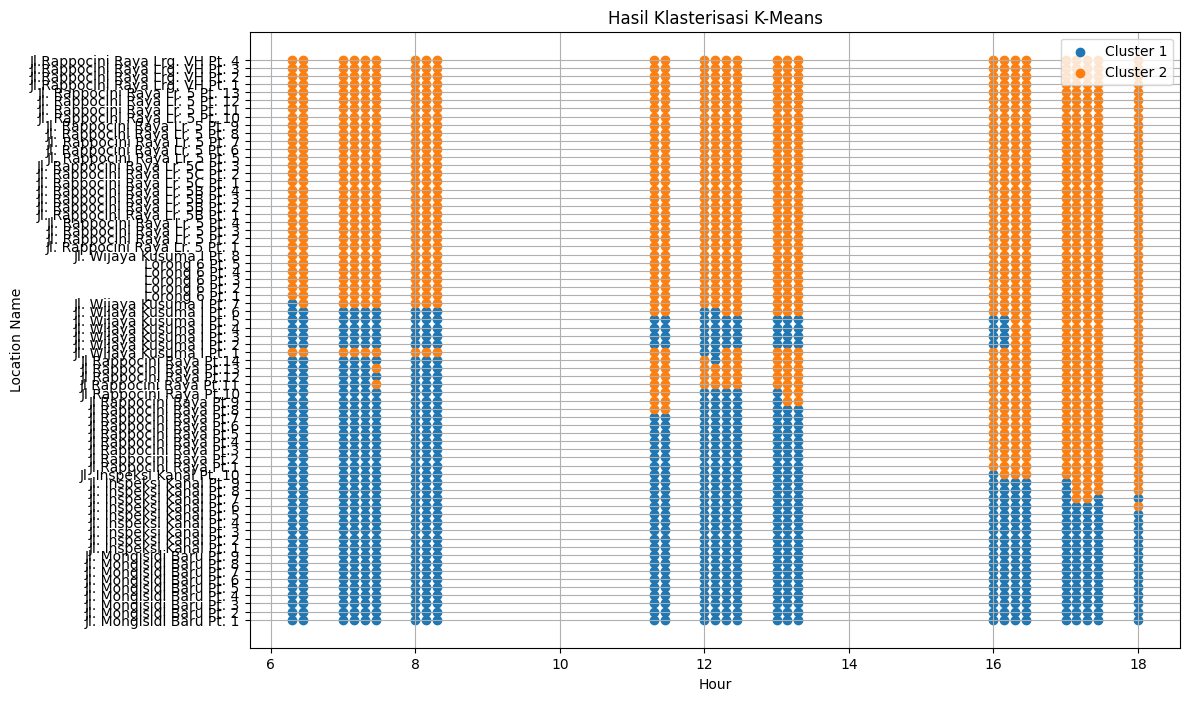

In [10]:
# Plot hasil klasterisasi
plt.figure(figsize=(12, 8))

# Warna berbeda untuk setiap klaster
for i in range(k):
    cluster_data = pivot_df[pivot_df['Cluster'] == i]
    plt.scatter(cluster_data['hour'], cluster_data['location_name'], label=f'Cluster {i+1}')

plt.title('Hasil Klasterisasi K-Means')
plt.xlabel('Hour')
plt.ylabel('Location Name')
plt.legend()
plt.grid(True)
plt.show()
